## Author : Saloni Angre
# Prediction using Unsupervised ML

### Prediction of the optimum number of clusters from the given iris dataset and represent it visually. This includes unsupervised learning.

In [1]:
#Importing all the libraries needed in this notebook
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

## Step 1: Reading the dataset

In [3]:
# Loading and reading the iris dataset 
# Data available at the link - 'https://bit.ly/3kXTdox'
data = pd.read_csv('C:/Users/dell/Desktop/TSF/task 2/Iris.csv')
print('Data import successfull')

Data import successfull


In [4]:
print(data.head()) # Loads the first five rows

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [5]:
print(data.tail()) # Loads the last five rows

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica  


In [6]:
# checking Nan values
print(data.isna().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [8]:
# checking statistical description
print(data.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


### Checking for unique classes in the dataset.

In [9]:
print(data.Species.nunique())
print(data.Species.value_counts())

3
Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64


## Step 2: Data visualization

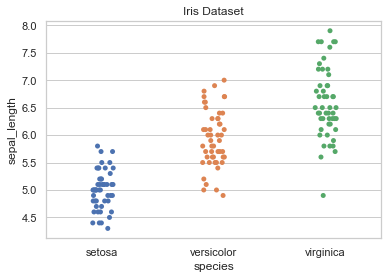

In [10]:
sns.set(style = 'whitegrid')
iris = sns.load_dataset('iris');
ax = sns.stripplot(x ='species',y= 'sepal_length',data = iris);
plt.title('Iris Dataset')
plt.show()

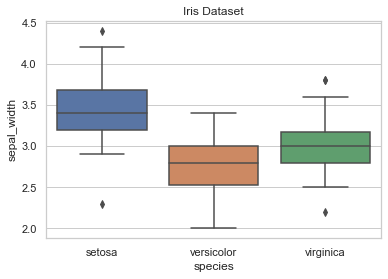

In [12]:
sns.boxplot(x='species',y='sepal_width',data=iris)
plt.title("Iris Dataset")
plt.show()

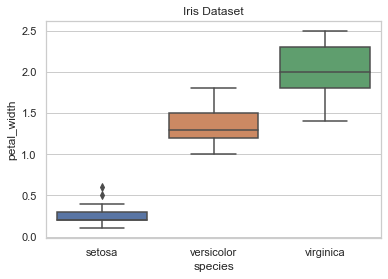

In [13]:
sns.boxplot(x='species',y='petal_width',data=iris)
plt.title("Iris Dataset")
plt.show()

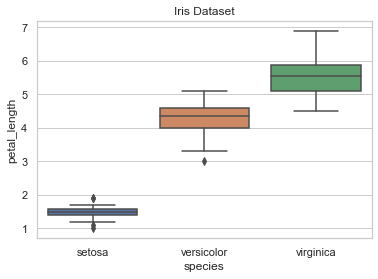

In [14]:
sns.boxplot(x='species',y='petal_length',data=iris)
plt.title("Iris Dataset")
plt.show()

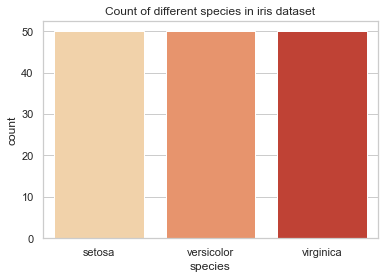

In [16]:
# count plot
sns.countplot(x='species',data=iris, palette="OrRd")
plt.title("Count of different species in iris dataset")
plt.show()

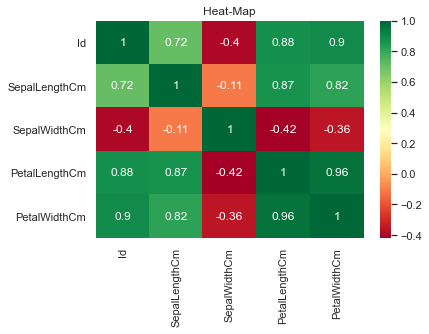

In [17]:
# heat map
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')
plt.title("Heat-Map")
plt.show()

## Step 3: Finding the optimum number of clusters using k-means clustering

In [23]:
x = data.iloc[:,[0,1,2,3]].values

from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    print('k:',i ,"wcss",kmeans.inertia_)

k: 1 wcss 281831.54466666654
k: 2 wcss 70581.3808
k: 3 wcss 31320.711199999994
k: 4 wcss 17758.792503556186
k: 5 wcss 11468.968747023802
k: 6 wcss 7921.863473076923
k: 7 wcss 5911.632365518538
k: 8 wcss 4541.979023391812
k: 9 wcss 3571.911095588236
k: 10 wcss 2943.9331008403374


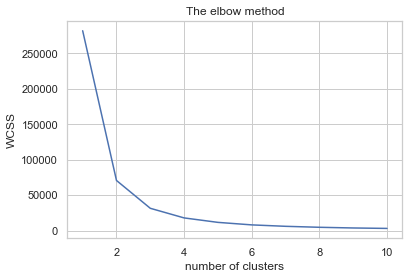

In [25]:
# plotting the results onto a line graph, allowing us to observe 'The elbow'

plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

## Step 4: Initializing K-means with optimum number of clusters

In [26]:
# fitting k-means to dataset
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)

# returns a label for each data point based on the number of clusters
y_kmeans = kmeans.fit_predict(x)


## Step 5: Predicting values


In [27]:
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## Visualizing the clusters

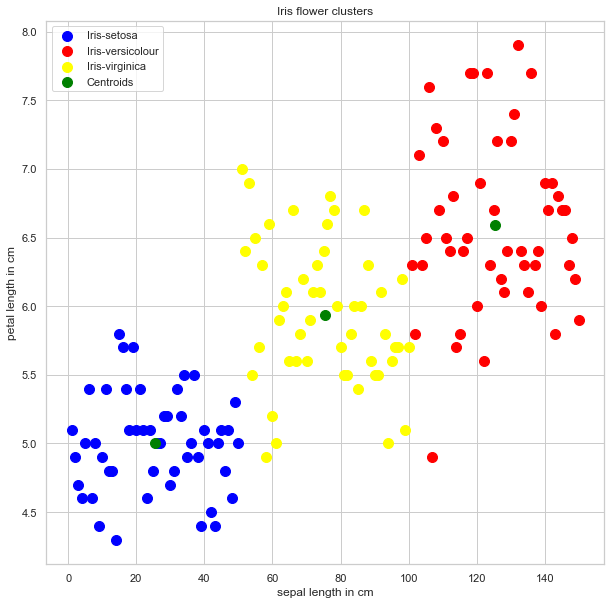

In [30]:
plt.figure(figsize=(10,10))
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='blue',label='Iris-setosa')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='red',label='Iris-versicolour')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='yellow',label='Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=100,c='green',label='Centroids')
plt.title('Iris flower clusters')
plt.xlabel('sepal length in cm')
plt.ylabel('petal length in cm')
plt.legend()
plt.show()